In [996]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import trim_mean
from math import sqrt

In [840]:
train2 =  pd.read_csv("./data.csv")

In [3]:
train.shape

(40455, 10)

In [4]:
train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
gas = train.z.value_counts()

In [6]:
train.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798385,61.747932,57.459085,5.732041,5.735939,3.539537,3939.242813
std,0.474353,1.432322,2.231152,1.123169,1.152802,0.709709,4000.344155
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2409.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5331.000000
max,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,18823.000000


In [7]:
train.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.024370,0.180861,0.975010,0.944669,0.948835,0.921898
depth,0.024370,1.000000,-0.296418,-0.028645,-0.032708,0.090617,-0.014383
table,0.180861,-0.296418,1.000000,0.195254,0.181997,0.149342,0.125521
x,0.975010,-0.028645,0.195254,1.000000,0.967161,0.966188,0.884500
y,0.944669,-0.032708,0.181997,0.967161,1.000000,0.941816,0.859138
z,0.948835,0.090617,0.149342,0.966188,0.941816,1.000000,0.857643
price,0.921898,-0.014383,0.125521,0.884500,0.859138,0.857643,1.000000


In [8]:
train.loc[(train['x']==0) | (train['y']==0) | (train['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
2221,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
3704,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0,3142
6404,2.25,Premium,H,SI2,62.8,59.0,0.00,0.00,0.0,18034
7283,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0,4731
10745,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
11017,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,4954
14718,2.80,Good,G,SI2,63.8,58.0,8.90,8.85,0.0,18788
16225,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,3837
21822,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
24739,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,5564


In [9]:
train = train[(train[['x','y','z']] != 0).all(axis=1)]


In [10]:
train

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698
...,...,...,...,...,...,...,...,...,...,...
40450,1.11,Premium,H,SI1,62.8,61.0,6.63,6.56,4.14,5315
40451,0.73,Ideal,F,VS2,62.6,56.0,5.77,5.74,3.60,2762
40452,1.26,Very Good,I,VS1,59.2,60.0,7.09,7.02,4.18,6855
40453,0.72,Ideal,G,SI2,61.4,56.0,5.76,5.83,3.56,2297


In [12]:
#cut_price = train[['cut','price']]

In [13]:
#cut_price.groupby(by=["cut"]).mean()

In [481]:
group_train = train1.groupby(by=['depth','color','cut','clarity','carat','table']).mean()


In [222]:
group_train

x     y     z   price
depth color cut   clarity carat table                          
43.0  G     Fair  SI1     1.00  59.0   6.32  6.27  3.97  3634.0
      J     Ideal VS2     1.09  54.0   6.53  6.55  4.12  4778.0
44.0  G     Fair  VS2     1.00  53.0   6.31  6.24  4.12  4032.0
50.8  I     Fair  VS1     1.43  60.0   7.73  7.25  3.93  6727.0
51.0  E     Fair  VVS2    0.30  67.0   4.67  4.62  2.37   945.0
...                                     ...   ...   ...     ...
71.8  H     Fair  VS1     1.02  56.0   6.04  5.97  4.31  4455.0
72.2  G     Fair  SI2     0.96  56.0   6.01  5.81  4.28  2438.0
73.6  J     Fair  I1      0.99  60.0   6.01  5.80  4.35  1789.0
78.2  E     Fair  I1      1.03  54.0   5.72  5.59  4.42  1262.0
79.0  E     Fair  VS2     0.50  73.0   5.21  5.18  4.09  2579.0

[35650 rows x 4 columns]

In [33]:
#group_train.groupby(by='color').median()

In [18]:
#group_train = group_train.reset_index()

In [463]:
train1

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698
...,...,...,...,...,...,...,...,...,...,...
40450,1.11,Premium,H,SI1,62.8,61.0,6.63,6.56,4.14,5315
40451,0.73,Ideal,F,VS2,62.6,56.0,5.77,5.74,3.60,2762
40452,1.26,Very Good,I,VS1,59.2,60.0,7.09,7.02,4.18,6855
40453,0.72,Ideal,G,SI2,61.4,56.0,5.76,5.83,3.56,2297


#xandy.loc[(xandy['volumen']>600000)]

In [1083]:
def cleaning_data(data):
    #Recogida de columnas
    
    new_data = data[(data[['x','y','z']] != 0).all(axis=1)]
    new_data = new_data.drop_duplicates()
        
    new_data['volumen'] = ((new_data['x'])*(new_data['y'])*(new_data['z']))
    
    new_data['xy'] = ((new_data['x'])*(new_data['y']))          
    new_data['yz'] = ((new_data['y'])*(new_data['z']))
    new_data['xz'] = ((new_data['x'])*(new_data['z']))

    
    new_data['carat'] = new_data['carat']
    new_data.loc[new_data['volumen'] > 100000, 'volumen'] = 12345
    
    new_data.loc[new_data['volumen'] > 3500000 , 'volumen'] = 12345

    
    new_data = new_data[(new_data[['volumen']] != 12345).all(axis=1)]
    

    """
    
    new_data.loc[new_data['depth'] > 72, 'depth'] = 1000
    new_data.loc[new_data['depth'] < 53, 'depth'] = 1000
    
    new_data.loc[new_data['table'] > 72, 'table'] = 1000
    new_data.loc[new_data['table'] < 50, 'table'] = 1000

    new_data = new_data[(new_data[['depth']] != 1000).all(axis=1)]
    new_data = new_data[(new_data[['table']] != 1000).all(axis=1)]

    
    table_carat_volumen = new_data.groupby(by='carat').mean()
    dict_volumen = dict(table_carat_volumen.volumen)
    
    #for ele in new_data['volumen']:
    for ele in range(len(new_data)):
        if new_data.loc[ele]['volumen'] == 0:
            print("gas")
            print(ele)
            new_data.loc[[ele],'volumen'] = dict_volumen[new_data.loc[ele]['carat']]
            print(new_data.loc[ele]['volumen'])


    
    cambios = ["cut","color","clarity"]
    for i in cambios:
        lista_cambios = dict(group_train.price.groupby(by=i).median())
        for j in lista_cambios:
            new_data.loc[new_data[i] == j,i] = lista_cambios[j]/100
    
    #Arreglar esto jode rque no coge las columnas
    
    new_data['score'] = ((new_data['color'])*0.6)*((new_data['clarity'])*0.5)*((new_data['carat'])*1)*((new_data['volumen'])*0.2)
   
    """
    lista_c = group_train.price.groupby(by="clarity").mean()

    clarity
    #new_data.loc[data['Volumen'], 'Volumen'] = data.x * data.y * data.z

    
    #Columna de condicion a drive. 
    #new_data['p_table'] = new_data.loc[data['table'] >= 53 and data['table'] <= 66 , 'p_table'] = 3
    #new_data.loc[data['table'] >= 55 and data['table'] <= 64 , 'cut'] = 3
    #new_data.loc[data['table'] >=56 and data['table'] <= 64 , 'cut'] = 3
    
    
    #Columna de condicion a drive. 
    new_data.loc[data['cut'] == "Fair", 'cut'] = 1 * cut
    new_data.loc[data['cut'] == "Good", 'cut'] = 2 * cut
    new_data.loc[data['cut'] == "Very Good", 'cut'] = 3 * cut
    new_data.loc[data['cut'] == "Premium", 'cut'] = 4 * cut
    new_data.loc[data['cut'] == "Ideal", 'cut'] = 5 * cut

    
    #Columna de condicion a numerica. (REVISAR ESTO) 
    new_data.loc[data['color'] == "D", 'color'] = 7 * color
    new_data.loc[data['color'] == "E", 'color'] = 6 * color
    new_data.loc[data['color'] == "F", 'color'] = 5 * color
    new_data.loc[data['color'] == "G", 'color'] = 4 * color
    new_data.loc[data['color'] == "H", 'color'] = 3 * color
    new_data.loc[data['color'] == "I", 'color'] = 2 * color
    new_data.loc[data['color'] == "J", 'color'] = 1 * color
    
    #Columna para limpiar los cylinders
    new_data.loc[data['clarity'] == "IF", 'clarity'] = 8 * clarity
    new_data.loc[data['clarity'] == "VVS1", 'clarity'] = 7 * clarity
    new_data.loc[data['clarity'] == "VVS2", 'clarity'] = 6 * clarity
    new_data.loc[data['clarity'] == "VS1", 'clarity'] = 5 * clarity
    new_data.loc[data['clarity'] == "VS2", 'clarity'] = 4 * clarity
    new_data.loc[data['clarity'] == "SI1", 'clarity'] = 3 * clarity
    new_data.loc[data['clarity'] == "SI2", 'clarity'] = 2 * clarity
    new_data.loc[data['clarity'] == "I1", 'clarity'] = 1 * clarity

    new_data['score'] = ((new_data['color'])*0.6)*((new_data['clarity'])*0.4)*((new_data['carat'])*1)

    
    All = new_data[['carat','cut','color','clarity','depth','volumen','price','score']]
    X = new_data[['carat','cut','color','clarity','depth','volumen','table','score']]
    #X = new_data[['carat','cut','color','clarity','volumen']]
    y = new_data[['price']]
    return All, X, y

In [862]:
for ele in range(len(train1)):
        if train1.loc[ele]['table'] >= 51 and train1.loc[ele]['table'] <= 53 or train1.loc[ele]['table'] >= 66 and train1.loc[ele]['table'] <= 71 :
            train1.loc[[ele],'point_table'] = 2
        elif train1.loc[ele]['table'] >= 70.9 or train1.loc[ele]['table'] <= 50.9 :
            train1.loc[[ele],'point_table'] = 1
        elif train1.loc[ele]['table'] >= 53 and train1.loc[ele]['table'] <= 66:
            train1.loc[[ele],'point_table'] = 3
            

In [891]:
for ele in range(len(train1)):
        if train1.loc[ele]['depth'] >= 53 and train1.loc[ele]['depth'] <= 56 or train1.loc[ele]['depth'] >= 64 and train1.loc[ele]['depth'] <= 67 :
            train1.loc[[ele],'point_depth'] = 2
        elif train1.loc[ele]['depth'] > 67 or train1.loc[ele]['depth'] < 53 :
            train1.loc[[ele],'point_depth'] = 1
        elif train1.loc[ele]['depth'] > 56 and train1.loc[ele]['depth'] <= 64:
            train1.loc[[ele],'point_depth'] = 3

In [1011]:
xandy, X, y = cleaning_data(train1)
xandy.head()

,carat,cut,color,clarity,depth,volumen,price,score
0,2.26,5,4,2,61.9,366.903680,12831,44.975934
1,2.43,3,3,2,63.2,392.176400,16170,41.683724
2,0.80,4,5,2,61.0,133.001901,2797,2.553636
3,0.40,5,5,1,63.3,64.059840,630,0.153744
4,0.31,5,4,4,61.6,51.797610,698,0.238932


In [1003]:
sqrt(int(X['volumen']))

TypeError: cannot convert the series to <class 'int'>

In [966]:
gasgas = xandy.sort_values(by='score')

KeyError: 'score'

In [952]:
gasgas

,carat,cut,color,clarity,depth,volumen,price,score,yz,xz
1413,0.23,26.73,18.635,11.07,62.3,37.928940,530,14.234,9.7755,9.5060
36685,0.23,26.73,18.635,11.07,58.6,38.328288,530,14.234,9.5344,9.4872
1159,0.23,30.87,18.635,11.07,64.4,37.732500,472,14.234,9.7500,9.6750
18948,0.23,26.73,18.635,11.07,61.7,39.064800,478,14.234,9.8400,9.7662
27212,0.23,26.73,18.635,11.07,62.0,37.780960,492,14.234,9.6380,9.5648
...,...,...,...,...,...,...,...,...,...,...
38950,3.00,30.87,42.33,40.77,59.3,471.079400,14918,1553.21,50.5450,51.2600
32735,3.01,35.5825,42.33,40.77,60.7,486.207480,18710,1558.39,52.0008,52.7340
2087,4.01,35.5825,42.33,32.61,62.5,621.496512,15223,1660.6,62.0256,62.5248
27887,4.50,31.87,42.33,32.61,65.8,698.455296,18531,1863.51,68.2752,68.7456


In [671]:
X.volumen.sort_values()

6972      15.853992
26698     16.121620
23695     16.131187
23238     16.145779
23032     16.198182
            ...    
13503    313.920607
27887    349.227648
40119    395.066604
7505     419.251200
7416     419.251200
Name: volumen, Length: 40345, dtype: float64

In [971]:
X

,carat,cut,color,clarity,depth,volumen,table,score
0,3.086342,0.983236,-0.356828,-1.620015,0.106715,3.005893,-0.205998,0.742949
1,3.445229,-0.813343,-1.239418,-1.620015,1.014881,3.326564,-0.205998,0.302935
2,0.004130,0.084946,0.525762,-1.620015,-0.522016,0.038048,-0.205998,-0.524293
3,-0.840311,0.983236,0.525762,-2.408277,1.084740,-0.836718,1.138924,-1.278604
4,-1.030311,0.983236,-0.356828,-0.043491,-0.102862,-0.992306,-1.102612,-0.906477
...,...,...,...,...,...,...,...,...
40359,0.658572,0.084946,-1.239418,-0.831753,0.735445,0.635144,1.587232,-0.274113
40360,-0.143647,0.983236,0.525762,-0.043491,0.595727,-0.136679,-0.654305,0.305449
40361,0.975238,-0.813343,-2.122008,0.744771,-1.779477,0.990241,1.138924,0.054012
40362,-0.164758,0.983236,-0.356828,-1.620015,-0.242580,-0.132665,-0.654305,-0.805902


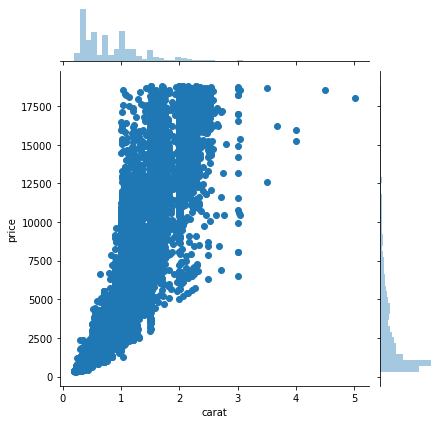

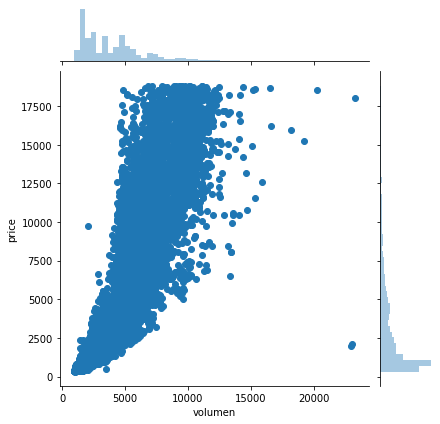

In [730]:

sns.jointplot(x='carat', y='price' , data=xandy, size=6)
"""
sns.jointplot(x='table', y='price' , data=xandy, size=6)
sns.jointplot(x='cut', y='price' , data=xandy, size=6)
sns.jointplot(x='clarity', y='price' , data=xandy, size=6)
sns.jointplot(x='depth', y='price' , data=xandy, size=6)
"""
sns.jointplot(x='volumen', y='price' , data=xandy, size=6)

In [ ]:
X

In [1090]:
def normalizar_table(new_data):
    
    lista_columnas_data = list(new_data.columns)

    scaler = StandardScaler()
    new_data = scaler.fit_transform(new_data)
    new_data = pd.DataFrame(new_data, columns=lista_columnas_data)
    new_data.carat = new_data.carat * 1.5
    new_data.color = new_data.color * 1.5
    new_data.clarity = new_data.clarity * 1.3
    new_data.score = new_data.score * 1.2

    
    return new_data

In [39]:
def a_pca(new_data):
    
       
    lista_pca = new_data.columns[:2]
    pca = new_data[lista_pca]
    #PCA para las marcas por separado
    pca_m = PCA(n_components=1)
    pca = pca_m.fit_transform(pca) 
    #Dataframe final marcas a UNIR.
    #columnas_marca = ["marca "+ str(i) for i in range(pca_marca)]
    pca = pd.DataFrame(pca)
    return pca

In [40]:
def final_table(new_data,df1):
    
    #Añadiendo columna ID A tablas
    lista_Id = list(new_data.index)
    df1['Id']=lista_Id
    new_data['Id']=lista_Id
    
    #Uniendo las tablas
    new_data = pd.merge(new_data,df1, on='Id')

    
    #Eliminando las columnas unidas PCAs
    new_data = new_data.drop(['cut','color','clarity','Id'], axis=1)


    return new_data

In [453]:
train1

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698
...,...,...,...,...,...,...,...,...,...,...
40450,1.11,Premium,H,SI1,62.8,61.0,6.63,6.56,4.14,5315
40451,0.73,Ideal,F,VS2,62.6,56.0,5.77,5.74,3.60,2762
40452,1.26,Very Good,I,VS1,59.2,60.0,7.09,7.02,4.18,6855
40453,0.72,Ideal,G,SI2,61.4,56.0,5.76,5.83,3.56,2297


In [1091]:
xandy, X, y = cleaning_data(train1)


In [1092]:
X= normalizar_table(X)


In [243]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [1093]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1078]:
X_train

,carat,cut,color,clarity,depth,volumen,table,score
16800,-0.945866,0.983236,2.290943,-0.831753,-0.661734,-0.911241,-1.102612,-0.606010
39104,0.679683,0.983236,-3.004598,-0.043491,-1.150746,0.733639,-0.205998,-0.966822
33240,0.447462,-0.813343,1.408353,-1.620015,1.154599,0.445362,0.242310,-0.006333
3642,0.426351,0.084946,-0.356828,-2.408277,0.525868,0.414367,2.035539,-1.027167
10914,-1.051422,-0.813343,-0.356828,-0.043491,0.875163,-1.013749,-1.102612,-0.926592
...,...,...,...,...,...,...,...,...
10545,-1.051422,0.983236,0.525762,2.321296,0.176574,-1.014925,-1.461258,-0.209997
6462,-0.924755,0.983236,0.525762,-0.831753,-0.172721,-0.904910,-0.205998,-0.851161
1854,0.447462,-0.813343,-1.239418,-0.043491,0.525868,0.432523,-0.205998,-0.006333
31096,1.503014,0.084946,0.525762,-0.043491,0.875163,1.437060,-0.654305,2.266657


In [1096]:
models = {
'RandomForestRegressor3': RandomForestRegressor(min_samples_leaf=1,min_samples_split=12,n_estimators=250),
'RandomForestRegressor4': RandomForestRegressor(min_samples_leaf=1,min_samples_split=12,n_estimators=270),
'RandomForestRegressor5': RandomForestRegressor(min_samples_leaf=1,min_samples_split=12,n_estimators=300),
'RandomForestRegressor6': RandomForestRegressor(min_samples_leaf=1,min_samples_split=12,n_estimators=320),
}

#'RandomForestRegressor2': RandomForestRegressor(min_samples_leaf=1,min_samples_split=2,n_estimators=300)
#Model=RandomForestRegressor2 Score=0.9973116469619476 mae=269.4 mse=266040.2618548914 auc=0.9829915944218515

#Model=RandomForestRegressor2 Score=0.9968831636203194 mae=269.83 mse=266722.2184340191 auc=0.9829479957800383

#Model=RandomForestRegressor2 Score=0.9943811146743322 mae=270.13 mse=267372.3074052097 auc=0.9829064344884999

#Model=RandomForestRegressor2 Score=0.9907183274123708 mae=272.89 mse=272647.89628258476 auc=0.9825691571355747
#Volumen al cuadrado y outliers fuera

#Model=RandomForestRegressor2 Score=0.9902079979447072 mae=282.91 mse=299685.22228536254 auc=0.9812680361137681
#Volumen al cuadrado y con outliers

#RandomForestRegressor(min_samples_leaf=2,min_samples_split=12,n_estimators=250) 
#Sin quitar outliers, por ahora el mejor modelo, 0,981218


for label,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    importance = model.feature_importances_
    print(importance)
    y_score = model.score(X_train,y_train)
    mae = round(mean_absolute_error(y_test, y_pred),2)
    mse = mean_squared_error(y_test, y_pred)
    auc = r2_score(y_test, y_pred)
    
   
    print('Model={} Score={} mae={} mse={} auc={}'.format(label, y_score, mae, mse**0.5, auc))


/home/josele639/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[0.04796646 0.00167104 0.0016843  0.00866247 0.00324731 0.83832188
 0.00139313 0.09705341]
Model=RandomForestRegressor3 Score=0.9924365411862244 mae=279.9 mse=540.6198269528758 auc=0.9820194625337753


/home/josele639/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[0.04502434 0.00167583 0.0016189  0.00885796 0.00326957 0.84106323
 0.00140522 0.09708494]
Model=RandomForestRegressor4 Score=0.992459220532617 mae=280.24 mse=541.2254407504862 auc=0.9819791556111442


/home/josele639/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[0.04540155 0.0017015  0.00160787 0.0089221  0.00324759 0.84071309
 0.00139121 0.09701508]
Model=RandomForestRegressor5 Score=0.9924724197386705 mae=279.78 mse=539.2539515273837 auc=0.9821102033785442


/home/josele639/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[0.04538246 0.00168209 0.0016638  0.00872894 0.00326151 0.84104036
 0.0014009  0.09683994]
Model=RandomForestRegressor6 Score=0.9924539453989346 mae=279.97 mse=540.517649773714 auc=0.9820262585367742


In [720]:
X

,carat,cut,color,clarity,depth,volumen,xy,yz,xz
0,0.523415,0.816353,-0.947067,-1.730858,-0.292754,0.401646,0.736077,0.594384,0.712321
1,0.124118,-0.146339,2.885219,-3.247979,-2.188023,0.679359,0.530573,-0.063038,-0.130665
2,0.523415,0.816353,-0.947067,4.337627,0.106249,0.152594,0.653781,0.700895,0.656912
3,-1.473073,-1.109030,0.330362,2.820506,-1.090762,-1.149655,-1.149197,-1.309280,-1.503741
4,1.721308,0.816353,-0.947067,-1.730858,0.305751,0.977766,1.611043,1.773681,1.587012
...,...,...,...,...,...,...,...,...,...
5567,0.523415,0.816353,2.885219,-1.730858,-0.392505,0.390253,0.530573,0.462900,0.383719
5568,0.124118,-0.146339,1.607790,-1.730858,0.505253,0.570454,-0.078696,-0.044684,0.161195
5569,0.523415,0.816353,2.885219,-3.247979,0.704755,0.477843,0.204400,0.431909,0.352311
5570,-1.073775,0.816353,-0.947067,4.337627,-0.891260,-1.222912,-0.874095,-1.082266,-1.094396


In [520]:
test1 =  pd.read_csv("./test.csv")

In [ ]:
test1.describe()

In [143]:
test2 = test1

In [178]:
dict_volumen[test2.loc[3]['carat']]

2199917.0271183443

In [1097]:
def cleaning_data_test(data):
    #Recogida de columnas
    
    features = ['id','carat','cut','color','clarity','depth','table','x','y','z']
    new_data = data[features]

    new_data['xy'] = ((new_data['x'])*(new_data['y']))          
    new_data['yz'] = ((new_data['y'])*(new_data['z']))
    new_data['xz'] = ((new_data['x'])*(new_data['z']))
    
    new_data['volumen'] = (new_data['x'])*(new_data['y'])*(new_data['z'])/2
      
    table_carat_volumen = new_data.groupby(by='carat').mean()
    dict_volumen = dict(table_carat_volumen.volumen)
    
    #for ele in new_data['volumen']:
    for ele in range(len(new_data)):
        if new_data.loc[ele]['volumen'] == 0:
            print("gas")
            print(ele)
            new_data.loc[[ele],'volumen'] = dict_volumen[new_data.loc[ele]['carat']]
            print(new_data.loc[ele]['volumen'])

    """ 
    cambios = ["cut","color","clarity"]
    for i in cambios:
        lista_cambios = dict(group_train.price.groupby(by=i).mean())
        for j in lista_cambios:
            new_data.loc[new_data[i] == j,i] = lista_cambios[j]/100
            
    new_data['score'] = ((new_data['color'])*0.6)*((new_data['clarity'])*0.5)*((new_data['carat'])*1)*((new_data['volumen'])*0.2)



    #new_data.loc[data['Volumen'], 'Volumen'] = data.x * data.y * data.z
    """
    #Columna de condicion a drive. 
    new_data.loc[data['cut'] == "Fair", 'cut'] = 1 * cut
    new_data.loc[data['cut'] == "Good", 'cut'] = 2 * cut
    new_data.loc[data['cut'] == "Very Good", 'cut'] = 3 * cut
    new_data.loc[data['cut'] == "Premium", 'cut'] = 4 * cut
    new_data.loc[data['cut'] == "Ideal", 'cut'] = 5 * cut

    
    #Columna de condicion a numerica. (REVISAR ESTO) 
    new_data.loc[data['color'] == "D", 'color'] = 7 * color
    new_data.loc[data['color'] == "E", 'color'] = 6 * color
    new_data.loc[data['color'] == "F", 'color'] = 5 * color
    new_data.loc[data['color'] == "G", 'color'] = 4 * color
    new_data.loc[data['color'] == "H", 'color'] = 3 * color
    new_data.loc[data['color'] == "I", 'color'] = 2 * color
    new_data.loc[data['color'] == "J", 'color'] = 1 * color
    
    #Columna para limpiar los cylinders
    new_data.loc[data['clarity'] == "IF", 'clarity'] = 8 * clarity
    new_data.loc[data['clarity'] == "VVS1", 'clarity'] = 7 * clarity
    new_data.loc[data['clarity'] == "VVS2", 'clarity'] = 6 * clarity
    new_data.loc[data['clarity'] == "VS1", 'clarity'] = 5 * clarity
    new_data.loc[data['clarity'] == "VS2", 'clarity'] = 4 * clarity
    new_data.loc[data['clarity'] == "SI1", 'clarity'] = 3 * clarity
    new_data.loc[data['clarity'] == "SI2", 'clarity'] = 2 * clarity
    new_data.loc[data['clarity'] == "I1", 'clarity'] = 1 * clarity
    
    new_data['score'] = ((new_data['color'])*0.6)*((new_data['clarity'])*0.4)*((new_data['carat'])*1)
    
    X = new_data[['carat','cut','color','clarity','depth','volumen','table','score']]
    #X = new_data[['carat','cut','color','clarity','volumen']]
    
    return X



In [1098]:
clean_test= cleaning_data_test(test1)

gas
789
57.75093924620061
gas
2831
81.31833063667825
gas
2905
159.62968230681813
gas
8793
96.14680896341466
gas
12672
161.22489


In [49]:
table_carat_volumen = clean_test.groupby(by='carat').mean()

In [50]:
dict_volumen = dict(table_carat_volumen.volumen)

In [1064]:
clean_test

,carat,cut,color,clarity,depth,volumen,table,score
0,0.56,5,2,4,62.1,46.610850,54.0,1.568
1,1.05,5,4,4,61.9,86.611680,56.0,5.880
2,0.50,4,6,4,61.5,40.545551,56.0,4.200
3,0.80,5,5,5,62.8,65.692014,56.0,7.000
4,0.54,5,4,5,61.4,43.513600,57.0,3.780
...,...,...,...,...,...,...,...,...
13480,0.70,4,3,3,59.0,58.560152,60.0,2.205
13481,0.55,5,4,6,62.3,45.859803,53.0,4.620
13482,1.54,5,4,3,61.5,125.972050,55.0,6.468
13483,0.30,4,4,2,62.7,24.489036,55.0,0.840


In [1099]:
final_test = normalizar_table(clean_test)


In [1100]:
final_test

,carat,cut,color,clarity,depth,volumen,table,score
0,-0.750362,0.977293,-2.119755,-0.033108,0.241489,-0.476695,-1.537773,-1.157851
1,0.803608,0.977293,-0.361712,-0.033108,0.101972,0.572360,-0.646693,0.699920
2,-0.940644,0.088755,1.396331,-0.033108,-0.177064,-0.635763,-0.646693,-0.023887
3,0.010766,0.977293,0.517309,0.759900,0.729801,0.023724,-0.646693,1.182458
4,-0.813789,0.977293,-0.361712,0.759900,-0.246823,-0.557923,-0.201152,-0.204838
...,...,...,...,...,...,...,...,...
13480,-0.306370,0.088755,-1.240734,-0.826117,-1.921035,-0.163315,1.135469,-0.883407
13481,-0.782075,0.977293,-0.361712,1.552909,0.381007,-0.496392,-1.983314,0.157065
13482,2.357578,0.977293,-0.361712,-0.826117,-0.177064,1.604618,-1.092233,0.953252
13483,-1.574917,0.088755,-0.361712,-1.619125,0.660042,-1.056858,-1.092233,-1.471500


In [1089]:
X

,carat,cut,color,clarity,depth,volumen,table,score
0,3.086342,0.983236,-0.356828,-1.620015,0.106715,3.005893,-0.205998,0.742949
1,3.445229,-0.813343,-1.239418,-1.620015,1.014881,3.326564,-0.205998,0.302935
2,0.004130,0.084946,0.525762,-1.620015,-0.522016,0.038048,-0.205998,-0.524293
3,-0.840311,0.983236,0.525762,-2.408277,1.084740,-0.836718,1.138924,-1.278604
4,-1.030311,0.983236,-0.356828,-0.043491,-0.102862,-0.992306,-1.102612,-0.906477
...,...,...,...,...,...,...,...,...
40359,0.658572,0.084946,-1.239418,-0.831753,0.735445,0.635144,1.587232,-0.274113
40360,-0.143647,0.983236,0.525762,-0.043491,0.595727,-0.136679,-0.654305,0.305449
40361,0.975238,-0.813343,-2.122008,0.744771,-1.779477,0.990241,1.138924,0.054012
40362,-0.164758,0.983236,-0.356828,-1.620015,-0.242580,-0.132665,-0.654305,-0.805902


In [1101]:
modelo = RandomForestRegressor(min_samples_leaf=1,min_samples_split=12,n_estimators=300)
gas = modelo.fit(X,y)

/home/josele639/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [1105]:
y_yiah = gas.predict(final_test)

In [1106]:
y_yiah

array([ 1286.55537373,  6589.83210567,  1642.06000558, ...,
       11309.55986293,   435.36937056,  1254.46591263])

In [1069]:
xandy

,carat,cut,color,clarity,depth,volumen,price,score
0,2.26,5,4,2,61.9,366.903680,12831,6.3280
1,2.43,3,3,2,63.2,392.176400,16170,5.1030
2,0.80,4,5,2,61.0,133.001901,2797,2.8000
3,0.40,5,5,1,63.3,64.059840,630,0.7000
4,0.31,5,4,4,61.6,51.797610,698,1.7360
...,...,...,...,...,...,...,...,...
40450,1.11,4,3,3,62.8,180.060192,5315,3.4965
40451,0.73,5,5,4,62.6,119.231280,2762,5.1100
40452,1.26,3,2,5,59.2,208.046124,6855,4.4100
40453,0.72,5,4,2,61.4,119.547648,2297,2.0160


In [1070]:
X_train

,carat,cut,color,clarity,depth,volumen,table,score
25149,0.71,4,7,4,62.7,110.997054,58.0,6.9580
10984,0.35,5,7,3,61.3,57.886362,57.0,2.5725
11156,2.00,4,7,2,59.3,314.146560,62.0,9.8000
11429,2.00,3,7,2,60.0,330.411456,56.0,9.8000
27382,1.33,2,2,5,63.7,212.881344,56.0,4.6550
...,...,...,...,...,...,...,...,...
26952,1.07,5,4,6,62.8,173.324384,57.0,8.9880
5817,1.07,3,2,3,58.4,177.991272,60.0,2.2470
23296,0.77,4,2,3,60.4,128.878444,58.0,1.6170
13467,1.01,1,4,4,65.1,153.282600,56.0,5.6560


In [985]:
train.min()

carat        0.200000
cut         20.390000
color       18.635000
clarity     11.070000
depth       43.000000
table       43.000000
x            3.730000
y            3.680000
z            1.410000
price      326.000000
volumen     31.707984
score       47.446574
dtype: float64

In [1107]:
y_yiah.mean()

3946.956183349986

In [1108]:
def crear_csv(y_pred,nombre):
    testcsv = test1['id']
    testcsv = pd.DataFrame(testcsv)
    testcsv['price'] = y_yiah
    testcsv.to_csv('model_{}.csv'.format(nombre), index=False)
    

In [1109]:
crear_csv(y_yiah, "randomforest_ultimointentoniggi")

In [ ]:
y_yiah

In [ ]:
xandy[xandy['carat']==0.50]

In [ ]:
clean_test